# Identication of putative contaminant taxa

In [67]:
setwd("/home/projects/14001280/PROJECTS/blood_microbiome/")
require(tidyverse)
require(ggplot2)
require(data.table)
require(egg)

Loading required package: egg

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Load data

In [100]:
genus_df <- fread("data/temp_files/07_abundance_matrix/subset_100.G.tsv") %>%
    separate(sample, into = c(NA, "npm_research_id"), sep = "_")
head(genus_df)

npm_research_id,Pseudomonas,Azotobacter,Acinetobacter,Moraxella,Aeromonas,Zobellella,Stenotrophomonas,Xanthomonas,Pseudoxanthomonas,⋯,Pseudoflavitalea,Isosphaera,Catenovulum,Nodularia,Methanosarcina,Fischerella,Woesvirus,Segniliparus,Candidatus Hamiltonella,Pseudopedobacter
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WHB3640,118399,49,5,2,131,2,66,18,15,⋯,0,0,0,0,0,0,0,0,0,0
WHB847,1,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
WHB8529,9,0,5,0,0,0,2,4,0,⋯,0,0,0,0,0,0,0,0,0,0
WHB4499,2,0,3,0,0,0,4,1,0,⋯,0,0,0,0,0,0,0,0,0,0
WHH5152,16,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
WHB3959,27,0,0,1,2,0,3,2,3,⋯,0,0,0,0,0,0,0,0,0,0


In [102]:
meta <- fread("data/SG10K_Health_metadata.n10714.16March2021.parsed.csv") %>%
    filter(npm_research_id %in% genus_df$npm_research_id)
nrow(meta)
head(meta)

[1] 59

npm_research_id,multiplex_pool_id,supplier_id,gis_internal_sample_id,site_supplying_sample,year_of_birth,supplied_gender,self_reported_ethnicity,extraction_kit,date_of_dna_extraction,⋯,supplied_and_computed_ethinicity_match,sop_agreement_for_coverage_14/28_for_15x/30x,sample_life_cycle,current,source_cohort,originalsupplierid,duplicateinfo,duplicate,duplicatepair,removalrequestedbysupplier
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
WHB10411,MUX9829,03295,HELIOS_03295_1,HELIOS,1970,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,13/6/2019,⋯,NA,Y,HELIOS VCF,Y,HELIOS,03295,,PASS,,NA
WHB10415,MUX9830,03299,HELIOS_03299_1,HELIOS,1974,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,13/6/2019,⋯,NA,Y,HELIOS VCF,Y,HELIOS,03299,,PASS,,NA
WHB3378,MUX8073,0116-0060,PRISM_0116_0060_NHC_TGH_1,PRISM,1962,M,Chinese,"Chemagic DNA Blood Kit (Perkin Elmer, MA)",21/9/2018,⋯,NA,Y,PRISM VCF,Y,PRISM,0116-0060/NHC/TGH,,PASS,,NA
WHB3404,MUX8080,0216-0021,PRISM_0216_0021_NHC_SBL_1,PRISM,1961,F,Chinese,"Chemagic DNA Blood Kit (Perkin Elmer, MA)",21/9/2018,⋯,NA,Y,PRISM VCF,Y,PRISM,0216-0021/NHC/SBL,,PASS,,NA
WHB3640,MUX8204,0916-0082,PRISM_0916_0082_NHC_ESC_1,PRISM,1976,F,Chinese,"Chemagic DNA Blood Kit (Perkin Elmer, MA)",8/10/2018,⋯,NA,N,PRISM VCF,Y,PRISM,0916-0082/NHC/ESC,,PASS,,NA
WHB3717,MUX8211,0117-0016,PRISM_0117_0016_NHC_WW9_1,PRISM,1985,F,Chinese,"Chemagic DNA Blood Kit (Perkin Elmer, MA)",24/10/2018,⋯,NA,Y,PRISM VCF,Y,PRISM,0117-0016/NHC/WW9,,PASS,,NA


### Explore metadata

In [32]:
colnames(meta)

[1] "npm_research_id"                                  
 [2] "multiplex_pool_id"                                
 [3] "supplier_id"                                      
 [4] "gis_internal_sample_id"                           
 [5] "site_supplying_sample"                            
 [6] "year_of_birth"                                    
 [7] "supplied_gender"                                  
 [8] "self_reported_ethnicity"                          
 [9] "extraction_kit"                                   
[10] "date_of_dna_extraction"                           
[11] "plate_position"                                   
[12] "plate_name"                                       
[13] "version_of_consent_form_signed"                   
[14] "sequencing_depth"                                 
[15] "npm_research_id_created_by_username"              
[16] "npm_research_id_creation_date"                    
[17] "comments_entered_when_npm_research_id_created"    
[18] "description_entered_when_npm_research_id_created" 
[19] "elm_project_id"                                   
[20] "elm_project_title"                                
[21] "elm_project_pi"                                   
[22] "species_of_sample_sequenced"                      
[23] "tehcnique_for_sequencing"                         
[24] "tissue_type_sequenced"                            
[25] "library_found_in_sequencing_run_id"               
[26] "library_found_in_passed_sequencing_run_id"        
[27] "vendor_sequencing_centre"                         
[28] "dna_sample_passed_qc"                             
[29] "library_prep_kit"                                 
[30] "run_id"                                           
[31] "instrument_id"                                    
[32] "instrument_serial_number"                         
[33] "hiseq_xtm_sbs_kit_300_cycles_v2_box_1of_2_lot"    
[34] "hiseq_xtm_sbs_kit_300_cycles_v2_box_2_of_2_lot"   
[35] "hiseq_xtm_pe_cluster_kit_cbottm_v2_box_1_of_2_lot"
[36] "hiseq_xtm_pe_cluster_kit_cbottm_v2_box_2_of_2_lot"
[37] "hiseq_xtm_flow_cell_v25_lot"                      
[38] "hiseq_xtm_flow_cell_v25_id"                       
[39] "sequencebased_gender"                             
[40] "cram_files_location"                              
[41] "estimate_of_sequence_coverage"                    
[42] "contamination_rate_of_chinese_genome"             
[43] "contamination_rate_of_indian_genome"              
[44] "contamination_rate_of_malaysian_genome"           
[45] "average_coverage_depth"                           
[46] "fb_variants"                                      
[47] "cram_filesize_mb"                                 
[48] "error_rate"                                       
[49] "fbvcf_filesize_mb"                                
[50] "gvcf_filesize_mb"                                 
[51] "insert_size_average"                              
[52] "insert_size_standard_deviation"                   
[53] "raw_total_sequences"                              
[54] "reads_duplicated_"                                
[55] "reads_properly_paired_"                           
[56] "cohort_jvcf_data_capacity"                        
[57] "fastq_file_size"                                  
[58] "jvcf_size"                                        
[59] "data_timestamp_for_fastq_file"                    
[60] "sequencing_analysis_pipeline"                     
[61] "cohorts_jointcalled_together"                     
[62] "library_archived_at_nscc"                         
[63] "gvcf_file_available"                              
[64] "sequencing_complete"                              
[65] "supplied_and_computed_gender_match"               
[66] "supplied_and_computed_ethinicity_match"           
[67] "sop_agreement_for_coverage_14/28_for_15x/30x"     
[68] "sample_life_cycle"                                
[69] "current"                                          
[70] "source_cohort"                                    
[71] "origi

In [111]:
plots <- list()
columns <- c("extraction_kit", "library_prep_kit", "vendor_sequencing_centre", 
             "instrument_id", "plate_name", "run_id", 
             "hiseq_xtm_sbs_kit_300_cycles_v2_box_1of_2_lot", "hiseq_xtm_sbs_kit_300_cycles_v2_box_2_of_2_lot",
             "hiseq_xtm_pe_cluster_kit_cbottm_v2_box_1_of_2_lot", "hiseq_xtm_pe_cluster_kit_cbottm_v2_box_2_of_2_lot",
             "hiseq_xtm_flow_cell_v25_lot", "originalsupplierid")
for (column in columns) {
    plt <- meta %>%
        mutate(across(everything(), as.character)) %>%
        select(all_of(column)) %>%
        group_by_at(column) %>%
        summarise(n = n()) %>%
        ggplot(aes_string(x = column, y = "n", fill = column)) +
            geom_bar(stat = "identity") +
            theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
            geom_text(aes_string(label = "n"))
    plots[[column]] <- plt
}

In [112]:
length(plots)

[1] 12

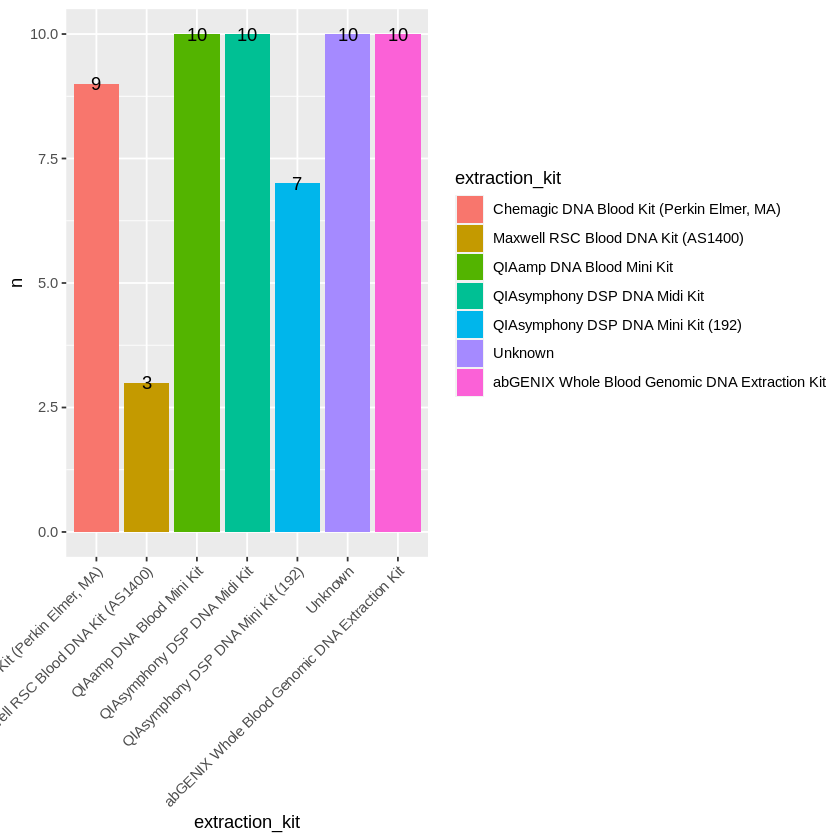

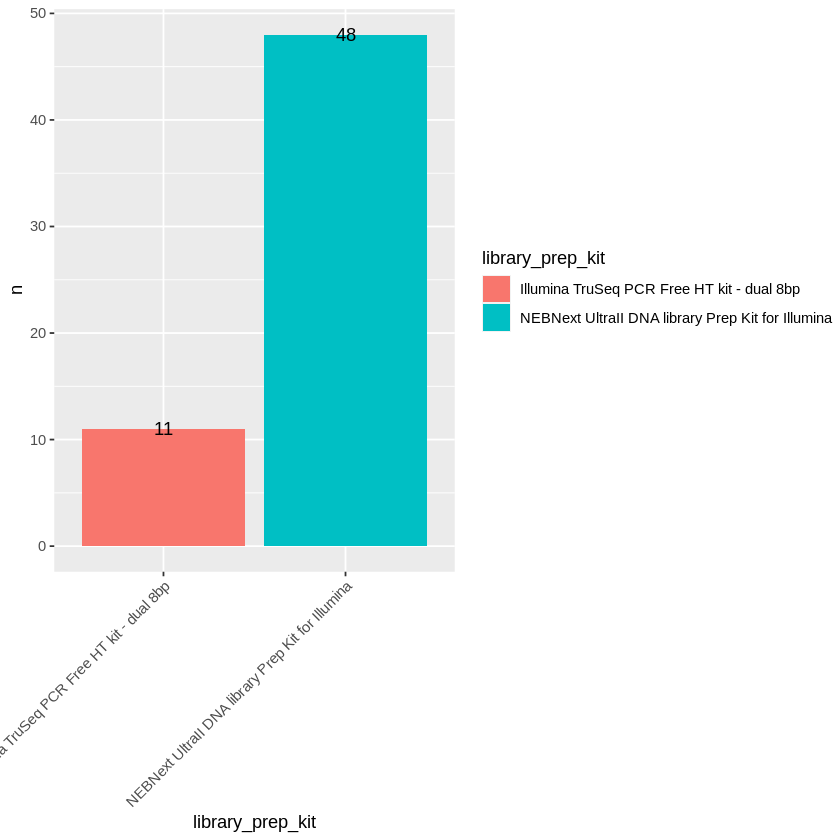

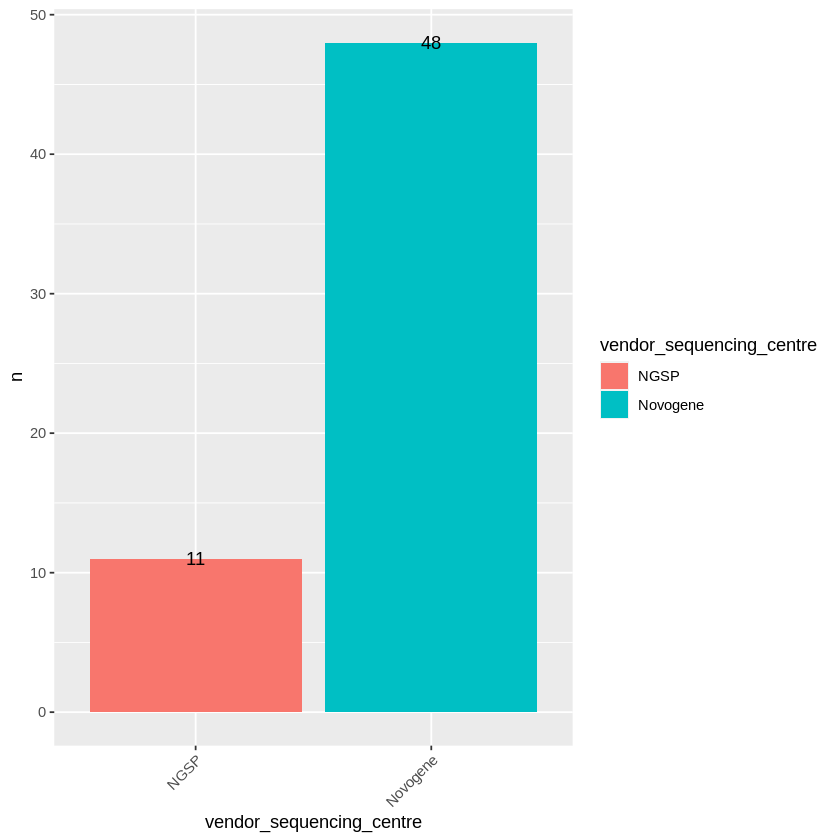

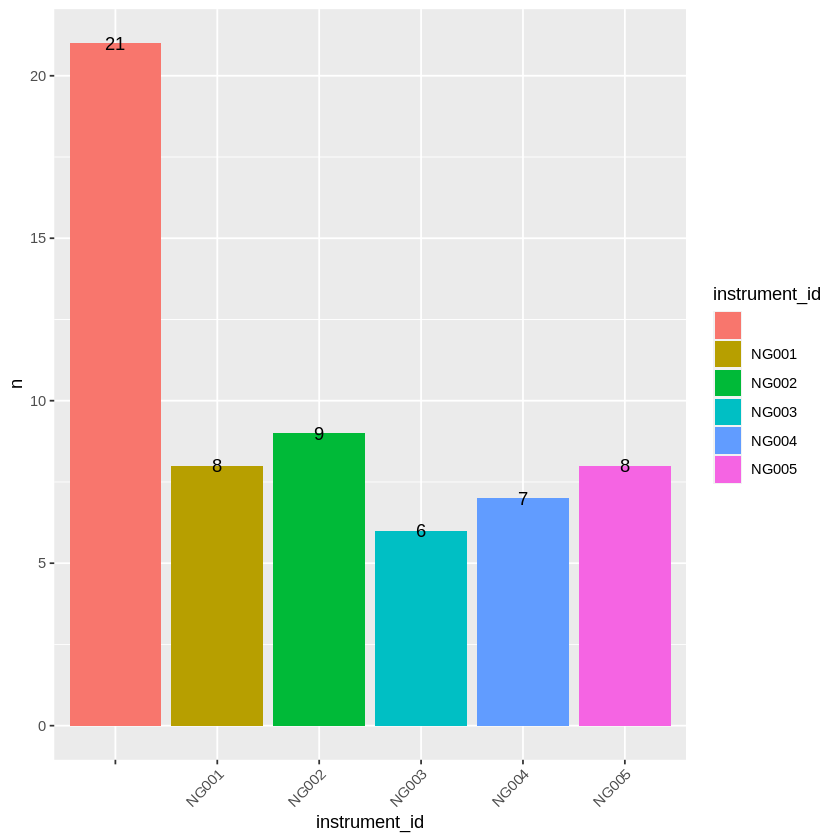

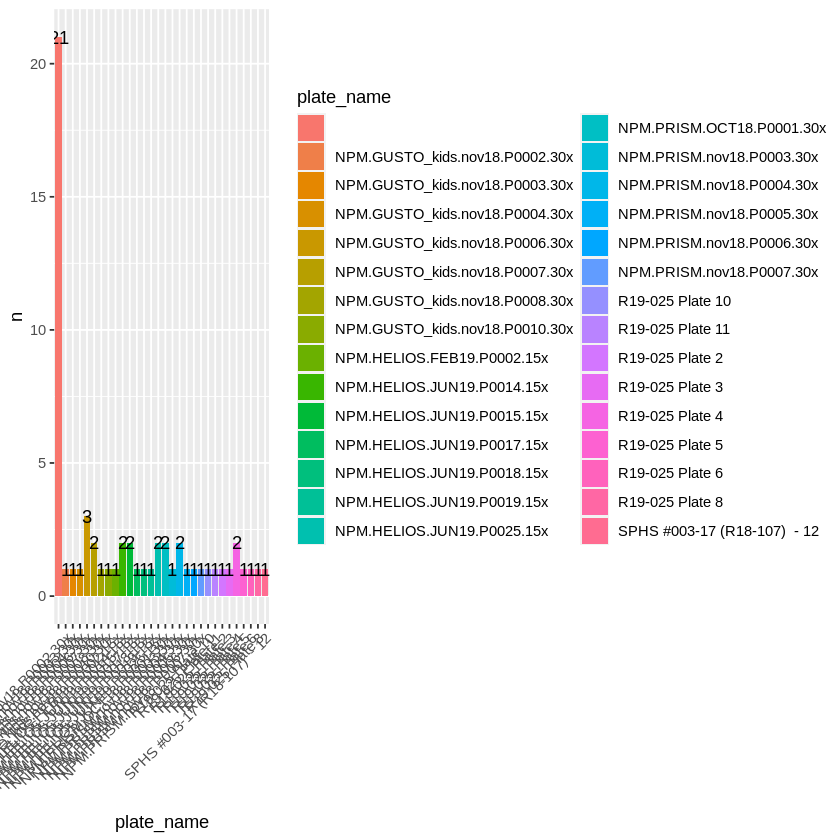

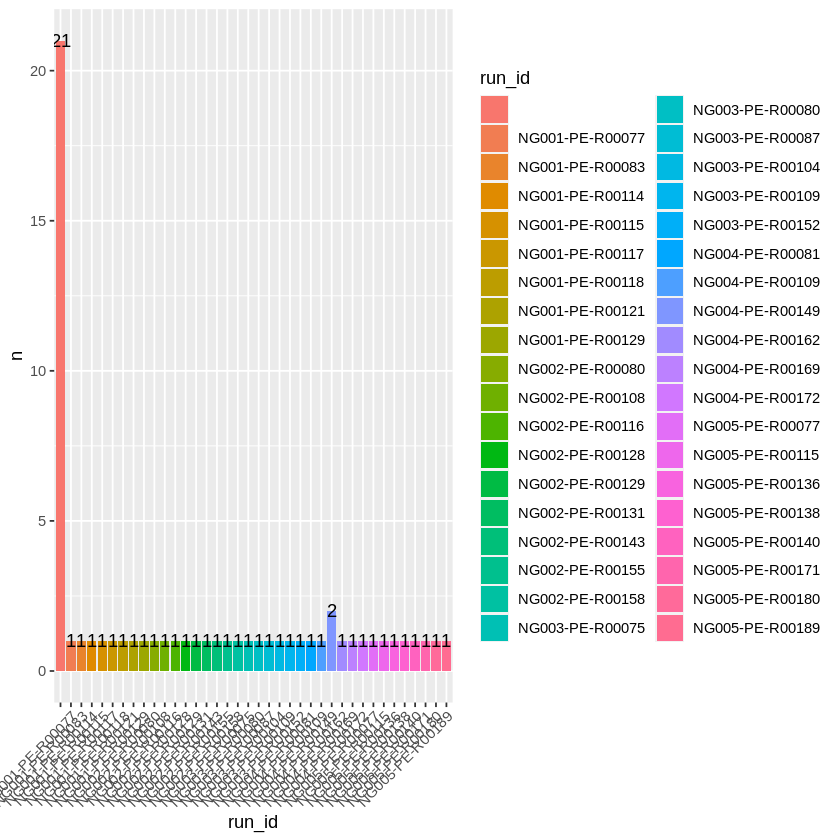

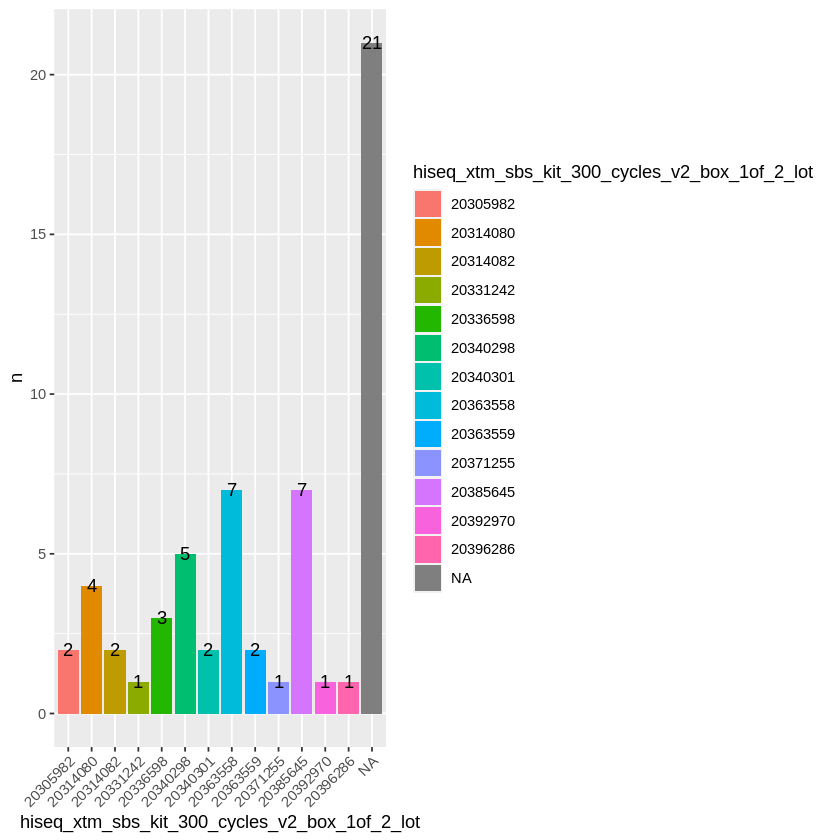

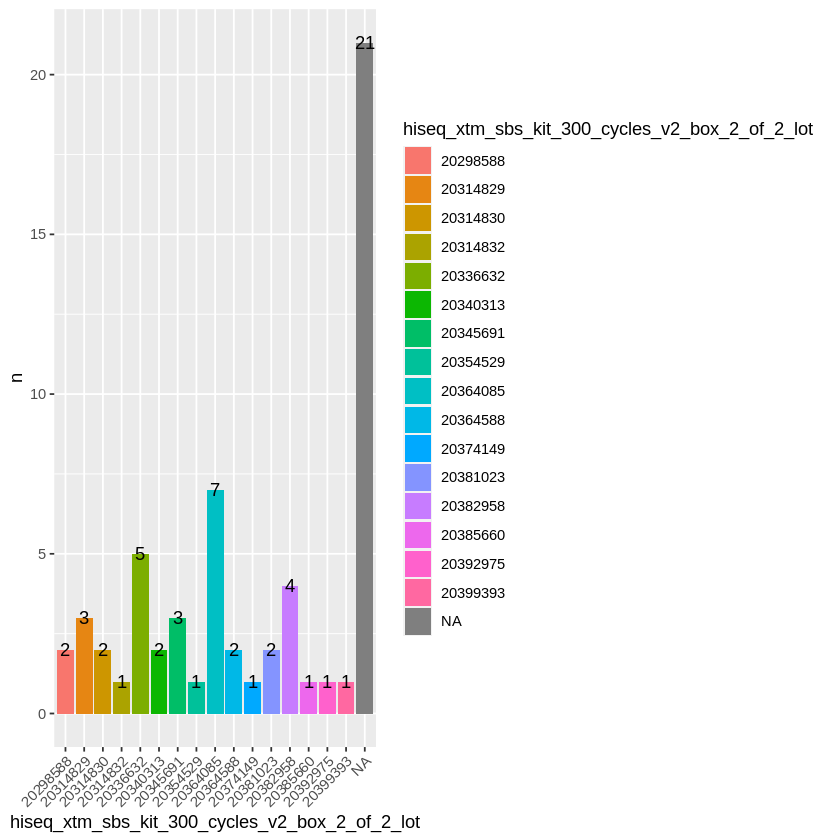

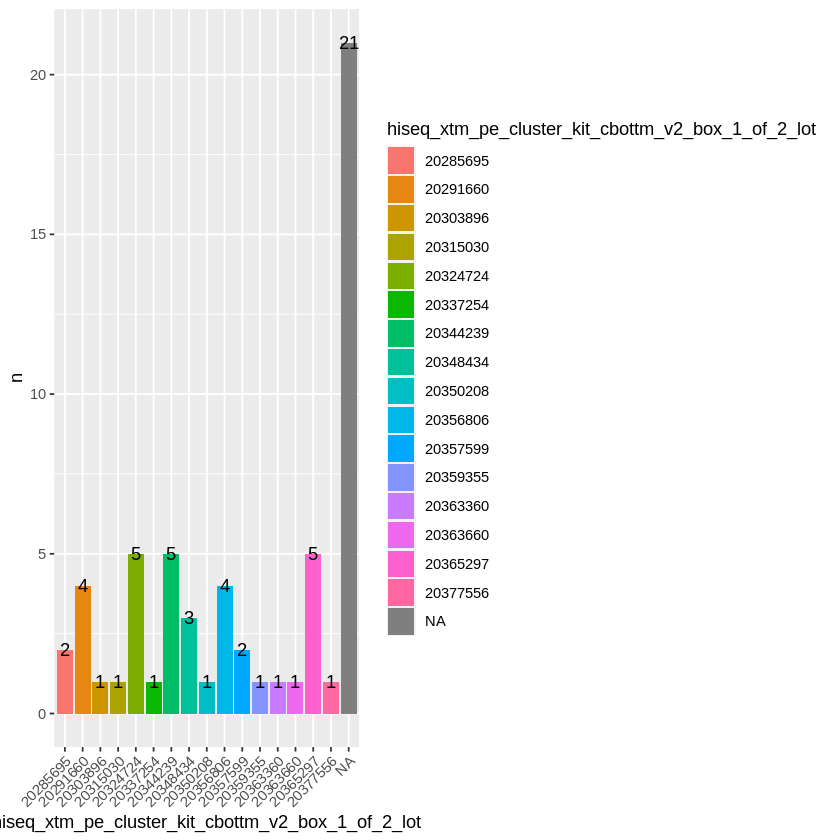

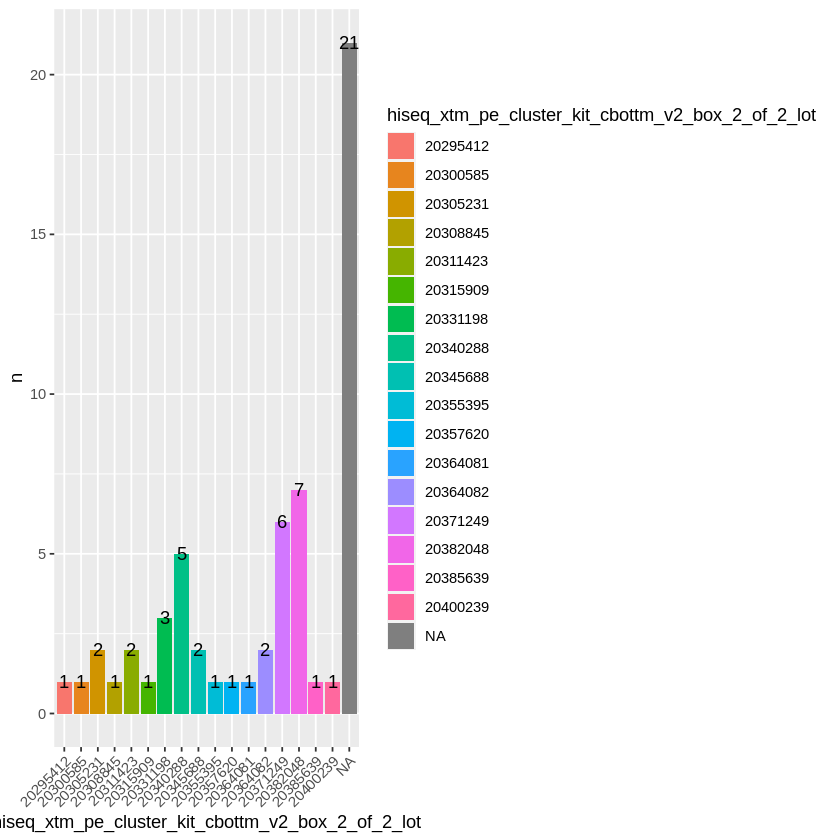

$extraction_kit

$library_prep_kit

$vendor_sequencing_centre

$instrument_id

$plate_name

$run_id

$hiseq_xtm_sbs_kit_300_cycles_v2_box_1of_2_lot

$hiseq_xtm_sbs_kit_300_cycles_v2_box_2_of_2_lot

$hiseq_xtm_pe_cluster_kit_cbottm_v2_box_1_of_2_lot

$hiseq_xtm_pe_cluster_kit_cbottm_v2_box_2_of_2_lot

$hiseq_xtm_flow_cell_v25_lot

$originalsupplierid


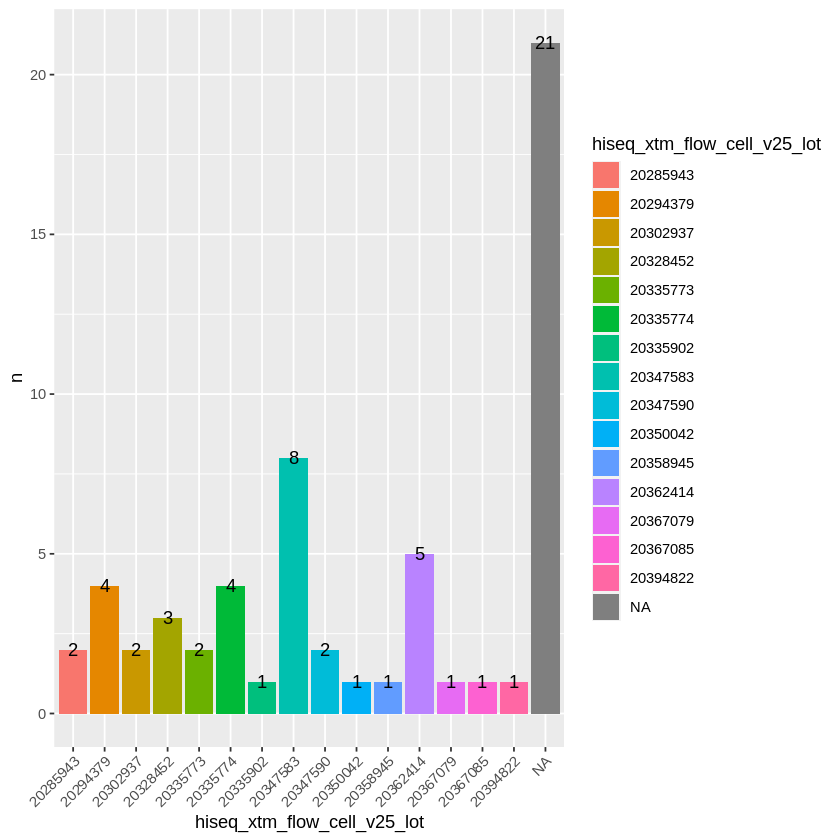

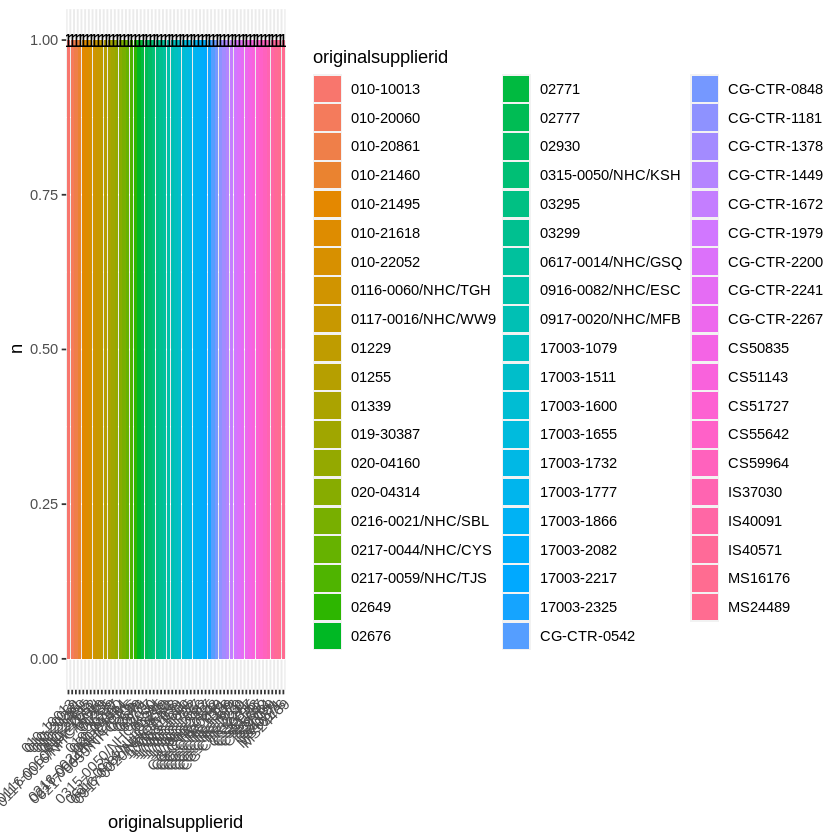

In [113]:
plots

adding dummy grobs



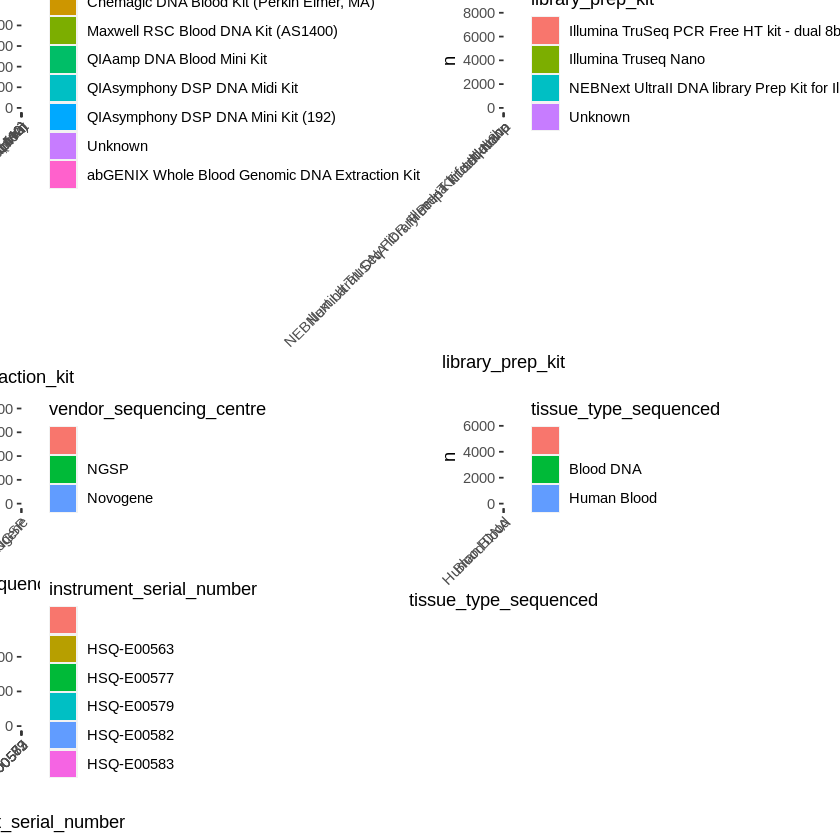

In [95]:
egg::ggarrange(plots = plots)

### Parse sample identifiers

In [7]:
genus_df <- genus_df %>%
    separate(sample, into = c(NA, "npm_research_id"), sep = "_")

In [23]:
ncol(meta) + 1

[1] 76

In [26]:
df <- meta %>%
    inner_join(genus_df, by = "npm_research_id")

X <- df %>%
    select(colnames(.)[(ncol(meta) + 1):ncol(.)])
cohort <- meta$

In [ ]:
m

### Get metadata vectors